# Libraries
Pandas
GeoPandas - map visualization
matplotlib

In [52]:
import pandas as pd
import geopandas as gpd


### Function to draw map and visualize languages

In [53]:
def plot_langs(df: pd.DataFrame, continent: str):
    x = df[['Name','Latitude', 'Longitude']]
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))

    gdf_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    filter = None
    if (continent == 'Eurasia') : filter = ((gdf_world['continent'] == 'Europe') | (gdf_world['continent'] == 'Asia'))
    elif (continent == 'Europe') : filter = ((gdf_world['continent'] == 'Europe') & (gdf_world['name'] != 'Russia')) #Asian part of Russia mess up map
    elif (continent == 'Eurafrica') : filter = (((gdf_world['continent'] == 'Europe') | (gdf_world['continent'] == 'Africa')) & (gdf_world['name'] != 'Russia')) #Asian part of Russia mess up map
    else: filter = gdf_world['continent'] > 'A' 

    # filter = gdf_world['continent'] > 'A'
    
    # ax = gdf_world[gdf_world['continent'] == 'Europe'].plot(figsize=(10, 6), color='white', edgecolor='black')
    ax = gdf_world[filter].plot(figsize=(10, 6), color='white', edgecolor='black')
    gdf.plot(ax=ax, marker='o', color='red', markersize=5)



# Overview of all languagues


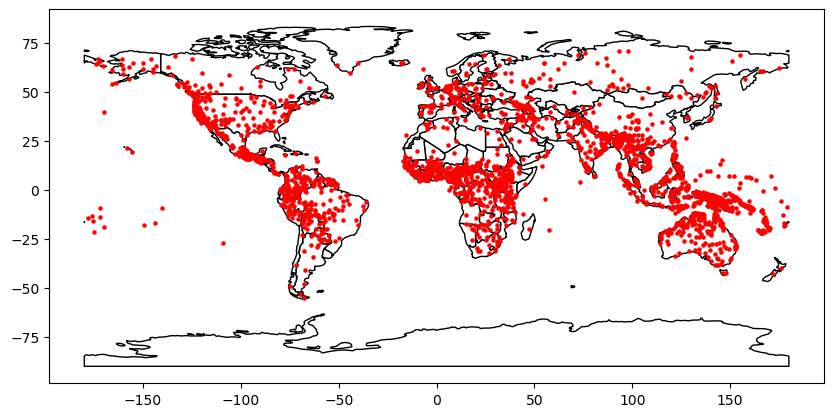

In [3]:
df = pd.read_csv('data/languages.csv', sep=',', index_col=0 )
plot_langs(df, 'world')

In [4]:
df.shape[0]

3573

# Filtering
- Geography
-  west of 40W
- east of 40E
- south of 30N

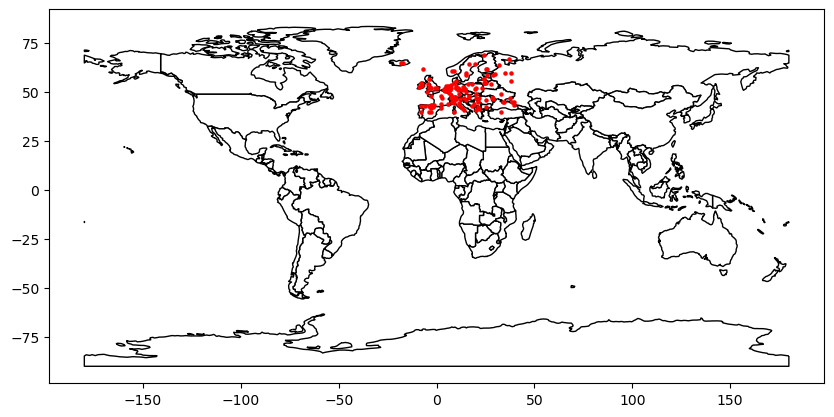

In [63]:
#West/ East /North
filter = (df['Longitude'] <= 40) & (df['Longitude'] >= -30) & (df['Latitude'] >= 40)
df_filter = df[filter]


plot_langs(df_filter, 'World')

In [64]:
df_filter

,Name,Macroarea,Latitude,Longitude,Glottocode,ISO639P3code,Family,Subfamily,Genus,GenusIcon,ISO_codes,Samples_100,Samples_200,Country_ID,Source,Parent_ID,geometry
ID,,,,,,,,,,,,,,,,,
adt,Adyghe (Temirgoy),Eurasia,45.216667,39.700000,adyg1241,ady,Northwest Caucasian,NaN,Northwest Caucasian,NaN,ady,False,False,RU,Kumaxov-1971 Rogava-and-Kerasheva-1966,genus-northwestcaucasian,POINT (39.70000 45.21667)
alb,Albanian,Eurasia,41.000000,20.000000,NaN,sqi,Indo-European,NaN,Albanian,NaN,sqi,False,False,RS AL,Buchholz-and-Fiedler-1987 Camaj-1969 Camaj-198...,genus-albanian,POINT (20.00000 41.00000)
alt,Alsatian,Eurasia,48.500000,7.500000,swis1247,gsw,Indo-European,NaN,Germanic,NaN,gsw,False,False,FR,Malherbe-and-Rosenberg-1996,genus-germanic,POINT (7.50000 48.50000)
ash,Adyghe (Shapsugh),Eurasia,45.000000,38.750000,adyg1241,ady,Northwest Caucasian,NaN,Northwest Caucasian,NaN,ady,False,False,RU,Smeets-1984,genus-northwestcaucasian,POINT (38.75000 45.00000)
ast,Asturian,Eurasia,43.250000,-6.000000,astu1245,ast,Indo-European,NaN,Romance,NaN,ast,False,False,ES,NaN,genus-romance,POINT (-6.00000 43.25000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wel,Welsh,Eurasia,52.000000,-3.000000,wels1247,cym,Indo-European,NaN,Celtic,NaN,cym,False,False,GB,Ball-1993 Bowen-and-Jones-1960 Comrie-and-Thom...,genus-celtic,POINT (-3.00000 52.00000)
ydb,Yiddish (Bessarabian),Eurasia,47.000000,28.500000,east2295,ydd,Indo-European,NaN,Germanic,NaN,ydd,False,False,MD,NaN,genus-germanic,POINT (28.50000 47.00000)
ydd,Yiddish,Eurasia,52.000000,23.000000,yidd1255,ydd,Indo-European,NaN,Germanic,NaN,ydd,False,False,UA BY DE LT PL,Katz-1987,genus-germanic,POINT (23.00000 52.00000)


# Manual curation
List generated above was manually eyeballed and eventually the following list was identified

In [66]:
eyeballed_list = ['alb','alt','ast','bsq','blr','bos','bre','bul','ctl','crn','cri','cze','dsh','dut','eng','est','far','fin','fre','fri','gae','gag',
'glc','ger','grk','heb','hun','ice','iri','ita','izh','kbl','krm','krl','ksu','kym','ldn','lno','lat','lit','liv','lge','lux','mcd','mlt','mol','nor','pol','por','rom','rmc','rus','srd','scr','svk','slo','svc',
'srb','spa','swe','tur','uby','ukr','urm','vep','vot','wel','ydd']

df_result = df_filter[df_filter.index.isin(eyeballed_list)]


# Output

In [68]:
# df_europe_standard_lang_only
df_output = df_result[['Name', 'Macroarea', 'Latitude', 'Longitude', 'Family', 'Subfamily', 'Genus']]
# df_output
df_output.to_csv('data/european_languages.csv')